In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\TaiLieu\HK3-Year3\Data Mining\adult.csv')
df.shape

(32561, 15)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


TIỀN XỬ LÝ DỮ LIỆU

In [5]:
#Xử lý dữ liệu "?" = np.nan
df.replace('?', np.nan, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
#Tìm giá trị thiếu
print("Biến thiếu")
print(df.isnull().sum())

Biến thiếu
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [7]:
#Xử lý cột "object" bằng cách fill giá trị bằng Mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

C:\Users\phanm\AppData\Local\Temp\ipykernel_22428\3103364499.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\phanm\AppData\Local\Temp\ipykernel_22428\3103364499.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [8]:
#Tìm giá trị thiếu
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

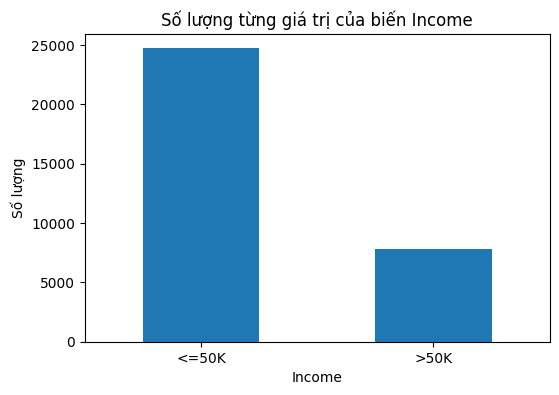

In [9]:
# Hiển thị số lượng từng giá trị của biến target 'income' bằng biểu đồ cột
plt.figure(figsize=(6,4))
df['income'].value_counts().plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Số lượng')
plt.title('Số lượng từng giá trị của biến Income')
plt.xticks([0,1], ['<=50K', '>50K'], rotation=0)
plt.show()

In [10]:
# Xử lý các dữ liệu dạng đối tượng
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'income':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [11]:
# Xóa cột 'fnlwgt' vì không cần thiết
df.drop(columns=['fnlwgt'], inplace=True)
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,11,9,6,9,1,4,0,0,4356,40,38,<=50K
1,82,3,11,9,6,3,1,4,0,0,4356,18,38,<=50K
2,66,3,15,10,6,9,4,2,0,0,4356,40,38,<=50K
3,54,3,5,4,0,6,4,4,0,0,3900,40,38,<=50K
4,41,3,15,10,5,9,3,4,0,0,3900,40,38,<=50K


In [12]:
# Chuẩn hóa cột income 
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,15,10,5,9,3,4,0,0,3900,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,15,10,4,10,1,4,1,0,0,40,38,0
32557,27,3,7,12,2,12,5,4,0,0,0,38,38,0
32558,40,3,11,9,2,6,0,4,1,0,0,40,38,1
32559,58,3,11,9,6,0,4,4,0,0,0,40,38,0


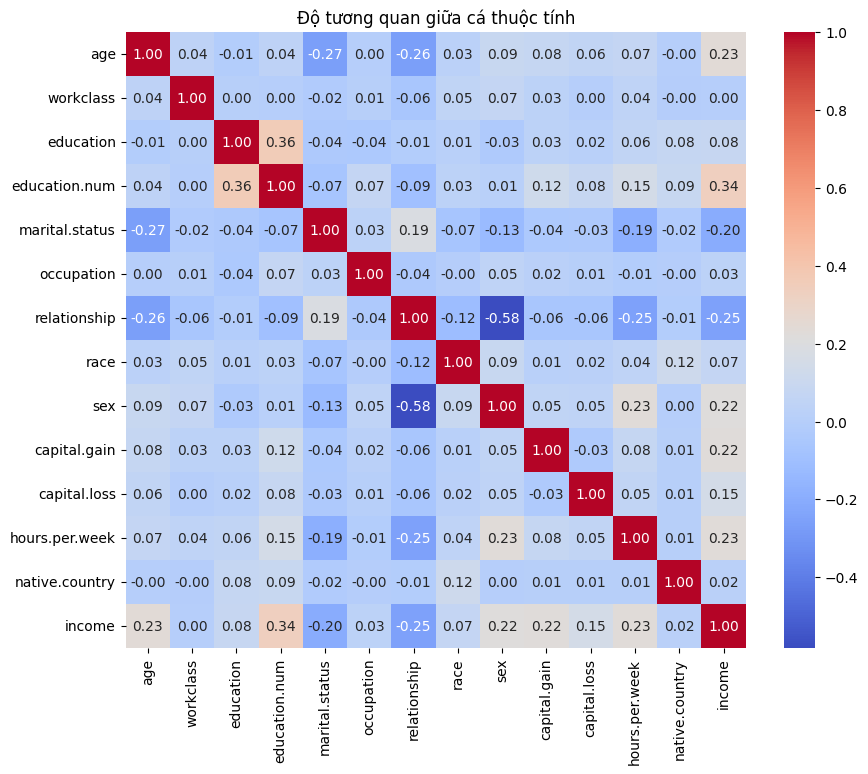

In [13]:
# Tính ma trận tương quan (correlation matrix) cho các cột số
corr = df.corr(numeric_only=True)

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Độ tương quan giữa cá thuộc tính')
plt.show()

CÀI ĐẶT THUẬT TOÁN CART

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   education       32561 non-null  int64
 3   education.num   32561 non-null  int64
 4   marital.status  32561 non-null  int64
 5   occupation      32561 non-null  int64
 6   relationship    32561 non-null  int64
 7   race            32561 non-null  int64
 8   sex             32561 non-null  int64
 9   capital.gain    32561 non-null  int64
 10  capital.loss    32561 non-null  int64
 11  hours.per.week  32561 non-null  int64
 12  native.country  32561 non-null  int64
 13  income          32561 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [16]:
# Chia dữ liệu X là đặc trưng và y là target
X = df.drop('income', axis=1)
y = df['income']

In [17]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Huấn luyện mô hình CART
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_leaf=20,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


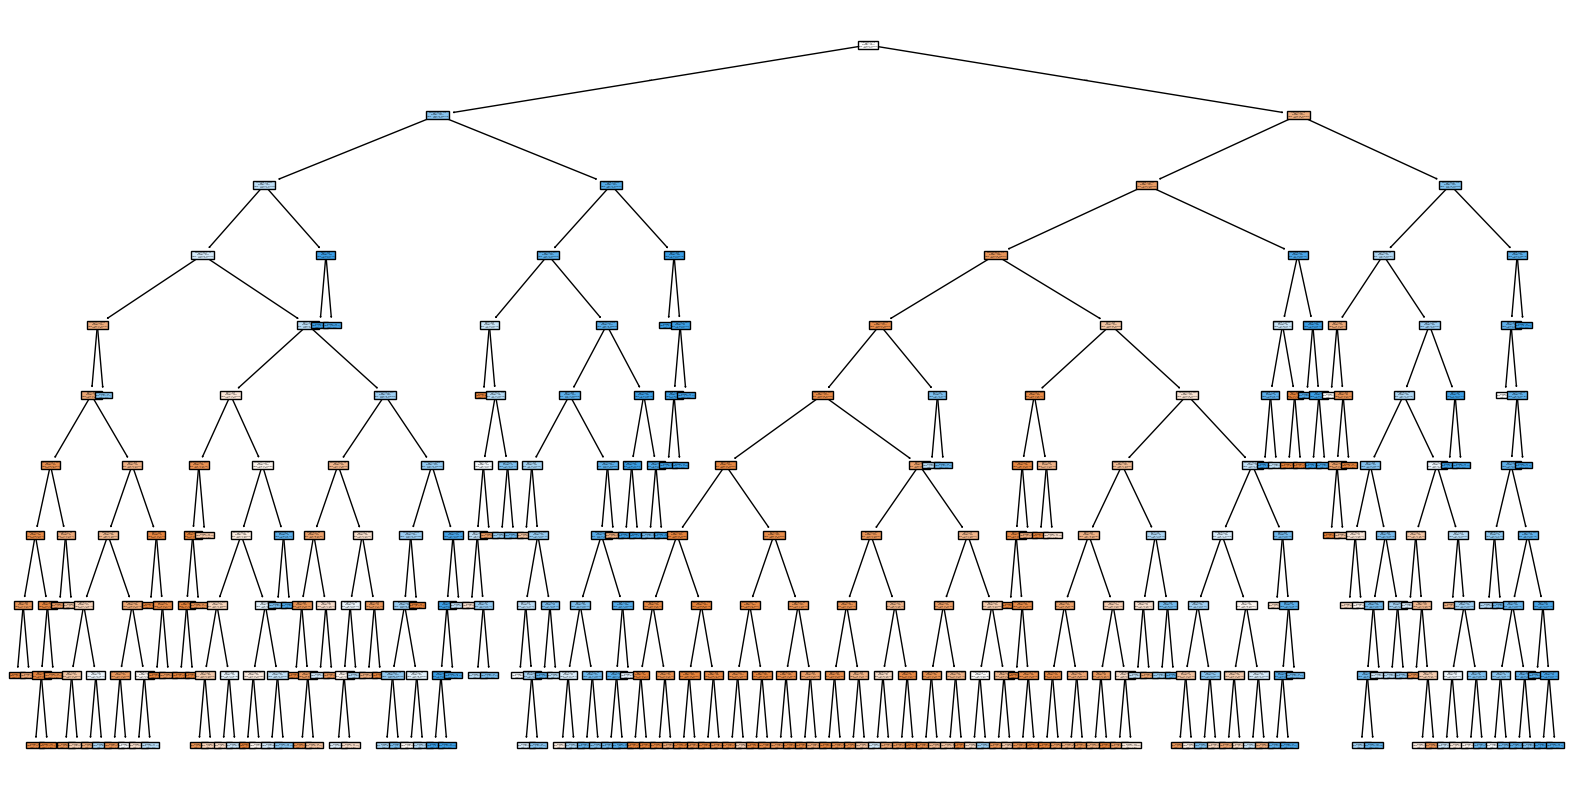

In [31]:
# Trực quan cây quyết định
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.show()

In [32]:
# Dự đoán trên tập test
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8114540150468295
Confusion matrix:
 [[3975 1001]
 [ 227 1310]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87      4976
           1       0.57      0.85      0.68      1537

    accuracy                           0.81      6513
   macro avg       0.76      0.83      0.77      6513
weighted avg       0.86      0.81      0.82      6513



## Cải Tiến

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)

Best params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}
